In [1]:
#Explore dataframe
import numpy
import pandas

# Datavisualization
from matplotlib import pyplot as plt
import seaborn

#Dataset treatment
from sklearn.preprocessing import OrdinalEncoder

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# ML 2 model
import xgboost as xg

# About the data

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [2]:
def nanValues(dataframe):
    missingValuesColumnsCount = dataframe.isnull().sum()
    totalCels = numpy.product(dataframe.shape)
    totalMissing = missingValuesColumnsCount.sum()
    percentValuesMissing = (totalMissing/totalCels)*100
    print("Percent of nan values:",percentValuesMissing)
    print("\nQuantite of nan values:\n",missingValuesColumnsCount)

In [3]:
def percentColumnNullValues(dataframe):
    columns = dataframe.columns
    nanColumns = []
    for column in columns:
        if (dataframe[column].isnull().sum() / dataframe[column].shape[0] )*100 > 0:
            print(column)
            print((dataframe[column].isnull().sum() / dataframe[column].shape[0] )*100)
            if column not in nanColumns:
                nanColumns.append(column)

In [4]:
def replaceNanValuesToMean(dataframe):
    # found nan values
    # replace nan values
    dataframe.fillna(dataframe.mean(), inplace = True)
    return dataframe

In [56]:
train_dataframe = pandas.read_csv("train.csv")
test_dataframe = pandas.read_csv("test.csv")

In [57]:
train_dataframe.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [58]:
columns_train_qualitative = [i for i in train_dataframe.columns if train_dataframe.dtypes[i] == 'object']
columns_train_quantitative = [i for i in train_dataframe.columns if train_dataframe.dtypes[i] != 'object']

In [59]:
columns_train_qualitative

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [60]:
columns_train_quantitative

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported']

In [61]:
nanValues(train_dataframe)

Percent of nan values: 1.9095824226389047

Quantite of nan values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


<AxesSubplot:>

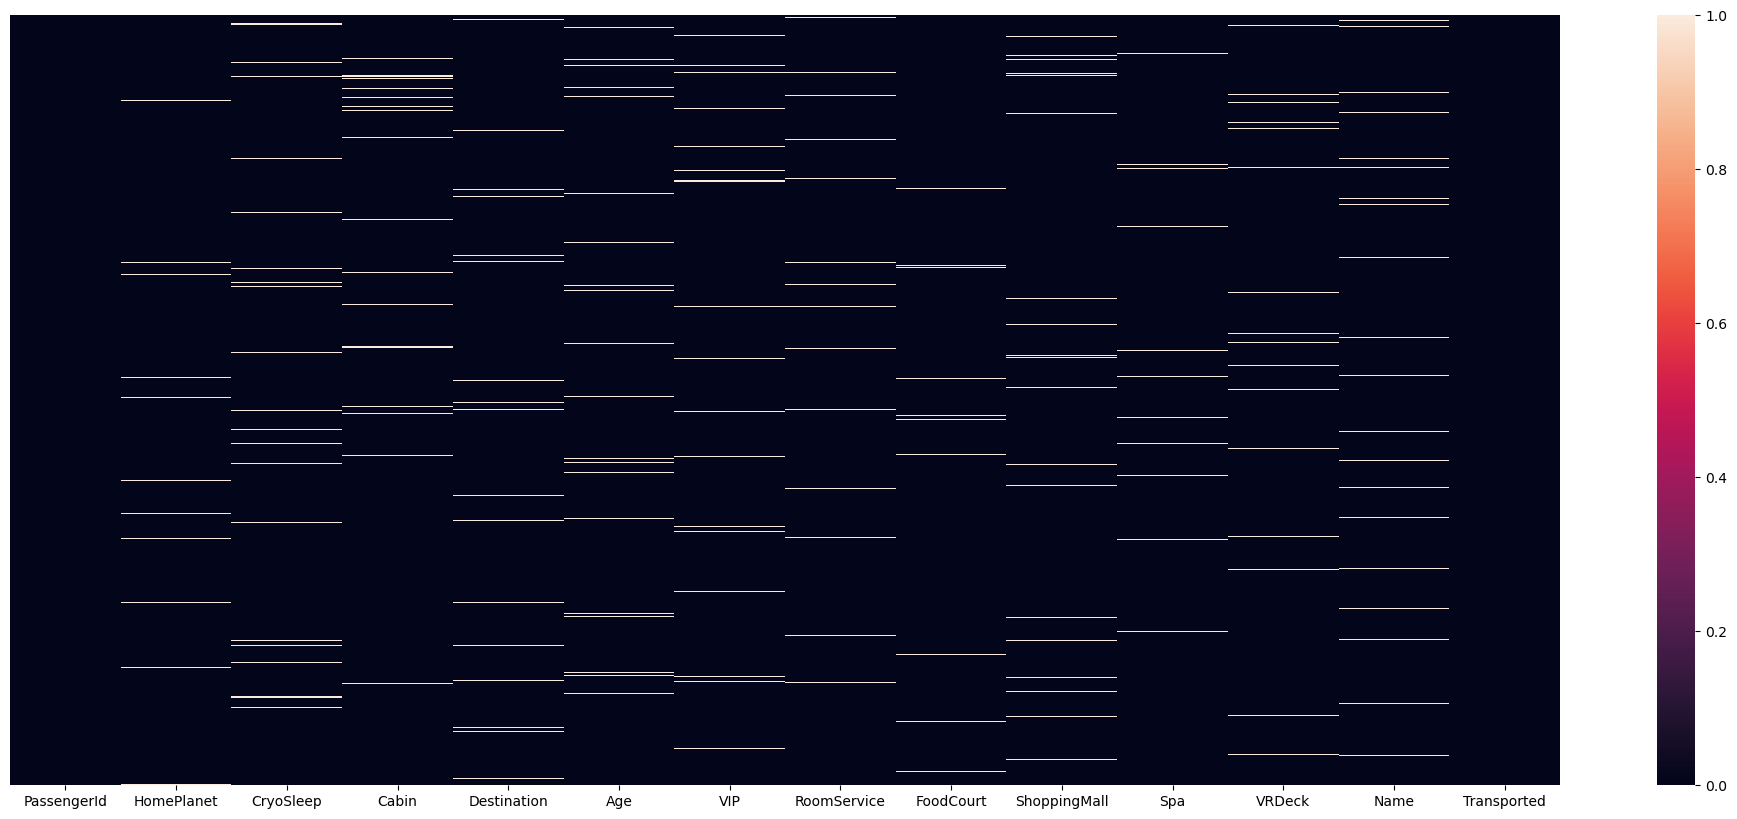

In [62]:
fig, ax = plt.subplots(figsize=(25,10))
seaborn.heatmap(data=train_dataframe.isnull(), yticklabels=False, ax=ax)

In [63]:
nanValues(train_dataframe)

Percent of nan values: 1.9095824226389047

Quantite of nan values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


# Tentar reaproveitar variaveis

Name

Ticket

In [64]:
def getLastName(dfresult):
    index = dfresult.index
    for i in index:
        dfresult['Name'][i] = dfresult['Name'][i].split()[1]
    return dfresult

In [65]:
train_last_name = train_dataframe[['Name']].dropna()
train_dataframe[['Name']]=getLastName(train_last_name)
##
test_last_name = test_dataframe[['Name']].dropna()
test_dataframe[['Name']]=getLastName(test_last_name)

/home/carlos/Apps/Anaconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RoomService'>

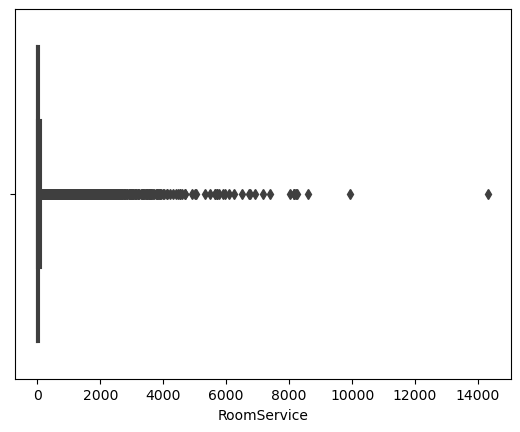

In [66]:
seaborn.boxplot(train_dataframe['RoomService'] , x='RoomService')

In [69]:
train_dataframe[train_dataframe['RoomService'] > 9000]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Dishocatal,False
5105,5455_01,Mars,False,E/344/P,55 Cancri e,13.0,False,9920.0,0.0,180.0,130.0,571.0,Nate,False


## Fim da tratativa

In [15]:
train_dataframe['RoomService'].mean()

224.687617481203

In [16]:
drop_column = ['Cabin']

train_dataframe.drop(drop_column, axis=1, inplace = True)
train_dataframe['VIP'].fillna(False, inplace=True)
train_dataframe['HomePlanet'].fillna(train_dataframe['HomePlanet'].mode()[0], inplace=True)
train_dataframe['Destination'].fillna(train_dataframe['Destination'].mode()[0], inplace=True)
train_dataframe['CryoSleep'].fillna(False, inplace=True)
train_dataframe['Age'] = replaceNanValuesToMean(train_dataframe['Age'])

train_dataframe['RoomService'].fillna(train_dataframe['RoomService'].mean(), inplace=True)

train_dataframe['FoodCourt'] = replaceNanValuesToMean(train_dataframe['FoodCourt'])
train_dataframe['ShoppingMall'] = replaceNanValuesToMean(train_dataframe['ShoppingMall'])
train_dataframe['Spa'] = replaceNanValuesToMean(train_dataframe['Spa'])
train_dataframe['VRDeck'] = replaceNanValuesToMean(train_dataframe['VRDeck'])
train_dataframe['CryoSleep'] = pandas.get_dummies(train_dataframe['CryoSleep'])[1]
train_dataframe['VIP'] = pandas.get_dummies(train_dataframe['VIP'])[1]

train_dataframe['Name'].fillna(train_dataframe['Name'].mode()[0], inplace=True)
#train_dataframe['Transported'] = pandas.get_dummies(train_dataframe['Transported'])[1]
#fazer o mesmo tratamento para os dados de test

test_dataframe
test_dataframe.drop(drop_column, axis=1, inplace = True)
test_dataframe['VIP'].fillna(False, inplace=True)
test_dataframe['HomePlanet'].fillna(test_dataframe['HomePlanet'].mode()[0], inplace=True)
test_dataframe['Destination'].fillna(test_dataframe['Destination'].mode()[0], inplace=True)
test_dataframe['CryoSleep'].fillna(False, inplace=True)
test_dataframe['Age'] = replaceNanValuesToMean(test_dataframe['Age'])

test_dataframe['RoomService'].fillna(test_dataframe['RoomService'].mean(), inplace=True)

test_dataframe['FoodCourt'] = replaceNanValuesToMean(test_dataframe['FoodCourt'])
test_dataframe['ShoppingMall'] = replaceNanValuesToMean(test_dataframe['ShoppingMall'])
test_dataframe['Spa'] = replaceNanValuesToMean(test_dataframe['Spa'])
test_dataframe['VRDeck'] = replaceNanValuesToMean(test_dataframe['VRDeck'])
test_dataframe['CryoSleep'] = pandas.get_dummies(test_dataframe['CryoSleep'])[1]
test_dataframe['VIP'] = pandas.get_dummies(test_dataframe['VIP'])[1]

test_dataframe['Name'].fillna(test_dataframe['Name'].mode()[0], inplace=True)

In [17]:
train_dataframe['VIP'].unique()

array([0, 1], dtype=uint8)

In [18]:
nanValues(train_dataframe)

Percent of nan values: 0.0

Quantite of nan values:
 PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [19]:
nanValues(test_dataframe)

Percent of nan values: 0.0

Quantite of nan values:
 PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


<AxesSubplot:>

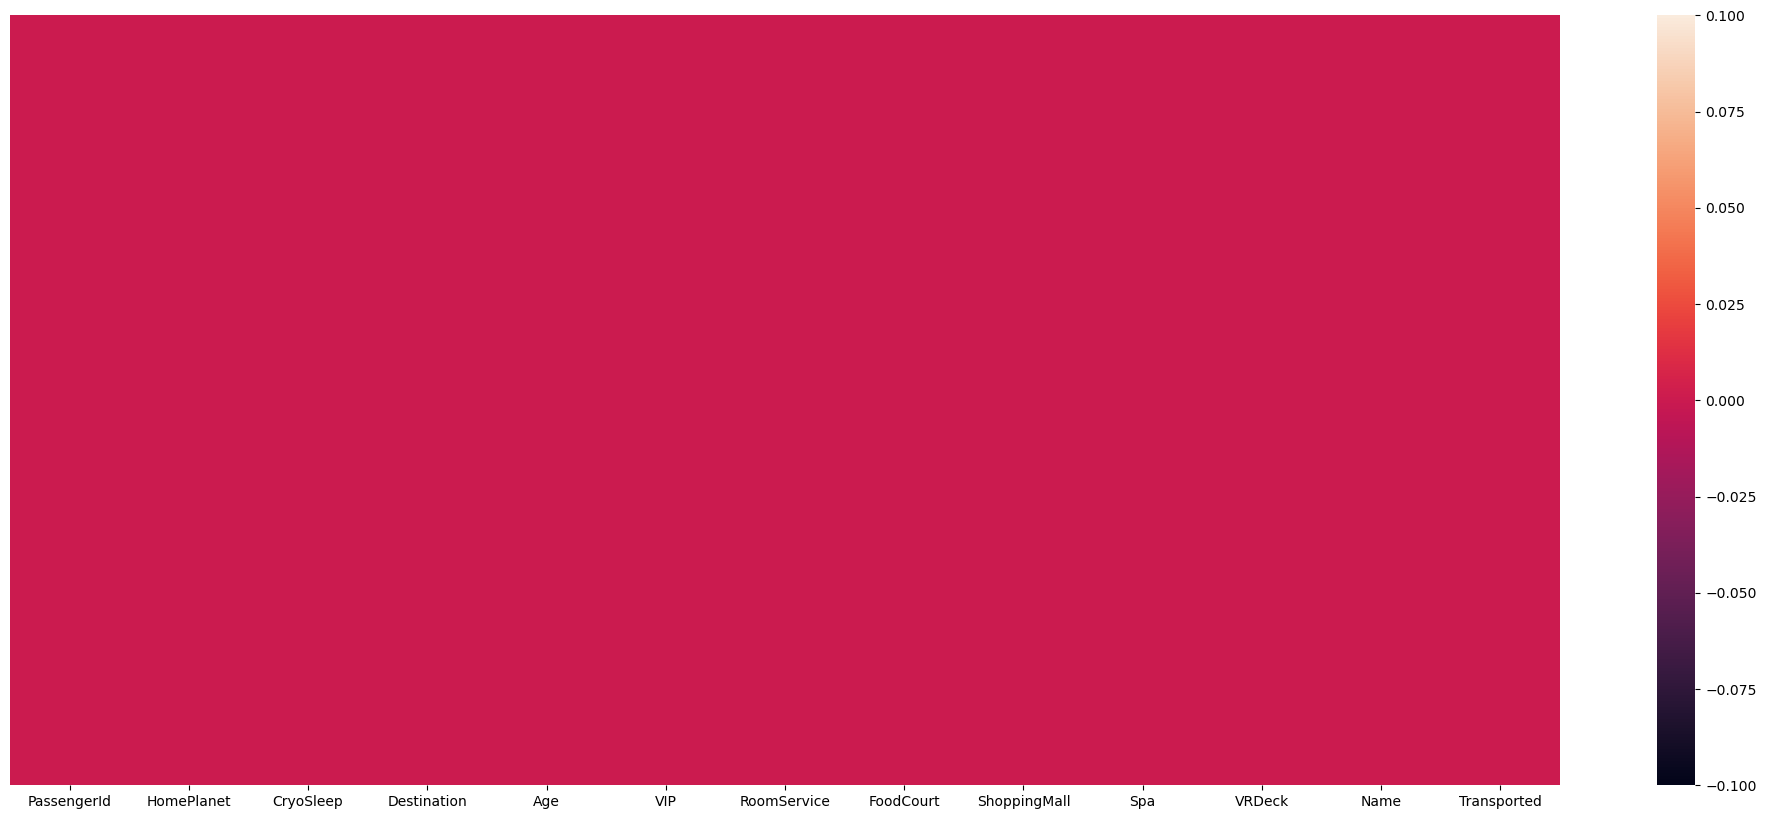

In [20]:
fig, ax = plt.subplots(figsize=(25,10))
seaborn.heatmap(data=train_dataframe.isnull(), yticklabels=False, ax=ax)

In [21]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.460132
VIP            -0.037261
Age            -0.069664
FoodCourt      -0.176139
ShoppingMall   -0.215192
VRDeck         -0.341068
Spa            -0.363079
RoomService    -0.364071
Name: Transported, dtype: float64

Transported     1.000000

CryoSleep       0.460132

VIP            -0.037261

Age            -0.069664

FoodCourt      -0.176139

ShoppingMall   -0.215192

VRDeck         -0.341068

Spa            -0.363079

RoomService    -0.364071


In [22]:
numpy.unique(train_dataframe[['VRDeck']][0:5])

array([  0.,   2.,  44.,  49., 193.])

In [23]:
#
ordinal_encoder = OrdinalEncoder(categories=[['Earth', 'Europa', 'Mars']])
train_dataframe['HomePlanet'] = ordinal_encoder.fit_transform(train_dataframe[['HomePlanet']])
#
ordinal_encoder = OrdinalEncoder(categories=[['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']])
train_dataframe['Destination'] = ordinal_encoder.fit_transform(train_dataframe[['Destination']])
#
unique_last_name=train_dataframe['Name'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_last_name])
train_dataframe['Name'] = ordinal_encoder.fit_transform(train_dataframe[['Name']])
#

#
ordinal_encoder = OrdinalEncoder(categories=[['Earth', 'Europa', 'Mars']])
test_dataframe['HomePlanet'] = ordinal_encoder.fit_transform(test_dataframe[['HomePlanet']])
#
ordinal_encoder = OrdinalEncoder(categories=[['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']])
test_dataframe['Destination'] = ordinal_encoder.fit_transform(test_dataframe[['Destination']])
#
unique_last_name=test_dataframe['Name'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_last_name])
test_dataframe['Name'] = ordinal_encoder.fit_transform(test_dataframe[['Name']])

In [24]:
numpy.unique(train_dataframe[['Destination']])

array([0., 1., 2.])

In [25]:
def CategorizeRoomService(price):
    for i in range(len(price)):
        if price[i] > 0:
            price[i] = 1
        else:
            price[i] = 0
    return price

In [26]:
train_dataframe['RoomService'] = CategorizeRoomService(train_dataframe['RoomService'])

/tmp/ipykernel_11112/1585811776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price[i] = 0
/tmp/ipykernel_11112/1585811776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price[i] = 1


In [52]:
train_dataframe['RoomService']
# foi verificado que mais de 2/3 das pessoas não pagaram pelo serviço de quarto, transformar em true or false
# e verificar o resultado

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
8688    0.0
8689    0.0
8690    0.0
8691    0.0
8692    1.0
Name: RoomService, Length: 8693, dtype: float64

In [53]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.460132
HomePlanet      0.135782
Name            0.049742
VIP            -0.037261
Age            -0.069664
Destination    -0.103728
FoodCourt      -0.176139
ShoppingMall   -0.215192
VRDeck         -0.341068
RoomService    -0.347021
Spa            -0.363079
Name: Transported, dtype: float64

## Outliers and noise

In [29]:
# seaborn.boxplot(data=train_dataframe.RoomService)

In [30]:
# train_dataframe.RoomService

In [31]:
#RoomService_outlier_conditional = train_dataframe.RoomService < 9000
#train_dataframe_without_outliers = train_dataframe[RoomService_outlier_conditional]

In [32]:
#seaborn.boxplot(data=train_dataframe_without_outliers , x='RoomService')

In [33]:
# RoomService_Q1 = train_dataframe.RoomService.quantile(0.25)
# RoomService_Q3 = train_dataframe.RoomService.quantile(0.75)
# RoomService_IQR = RoomService_Q3-RoomService_Q1
# RoomService_outlier_conditional =  ((train_dataframe.RoomService > RoomService_Q1 - 1.5*RoomService_IQR) & (train_dataframe.RoomService < RoomService_Q3 + 1.5*RoomService_IQR))

In [34]:
# train_dataframe_without_outliers = train_dataframe_without_outliers[RoomService_outlier_conditional]

In [35]:
#seaborn.boxplot(data=train_dataframe_without_outliers , x='RoomService')

In [36]:
# para valores booleanos
# RoomService_Q1 = train_dataframe.RoomService.quantile(0.25)
# RoomService_Q3 = train_dataframe.RoomService.quantile(0.75)
# RoomService_IQR = RoomService_Q3-RoomService_Q1
# RoomService_outlier_conditional =  ((train_dataframe.RoomService > RoomService_Q1 - 1.5*RoomService_IQR) & (train_dataframe.RoomService < RoomService_Q3 + 1.5*RoomService_IQR))

In [37]:
# train_dataframe_without_outliers = train_dataframe[RoomService_outlier_conditional]
# train_dataframe_without_outliers

In [38]:
# seaborn.boxplot(data=train_dataframe_without_outliers , x='RoomService')

In [39]:
# train_dataframe = train_dataframe_without_outliers

# Normalize de data

# Machine learning

In [40]:
features = train_dataframe.drop("Transported",axis=1)
target = train_dataframe["Transported"]
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=22)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6085, 12), (2608, 12), (6085,), (2608,))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 78.34
The cross validated score for Random Forest Classifier is: 76.54


Text(0.5, 1.05, 'Confusion_matrix')

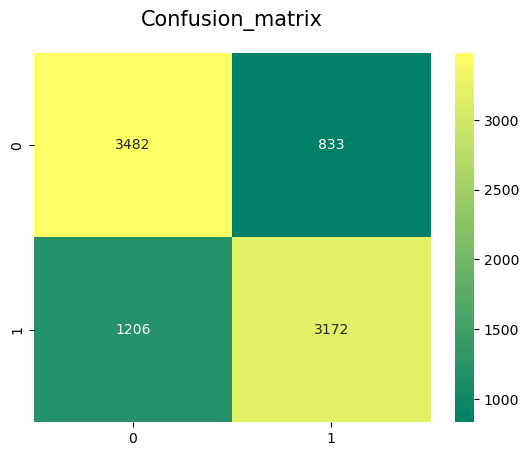

In [41]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

#n_estimators its exemples quantite that we will use in the training
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

#Model training
model.fit(X_train,y_train)
#model prediction with 0 or 1 of result
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))

kfold = KFold(n_splits=5, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,features,target,cv=10,scoring='accuracy')

print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(model,features,target,cv=10)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of the Random Forest Classifier is 79.72

The cross validated score for Random Forest Classifier is: 76.14

In [42]:
train_dataframe=train_dataframe.drop("PassengerId", axis=1)
train_X = train_dataframe.drop("Transported", axis=1)
train_Y= train_dataframe["Transported"]
test_X  = test_dataframe.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((8693, 11), (8693,), (4277, 11))

In [43]:
train_X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [44]:
test_X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

Accuracy  94.54


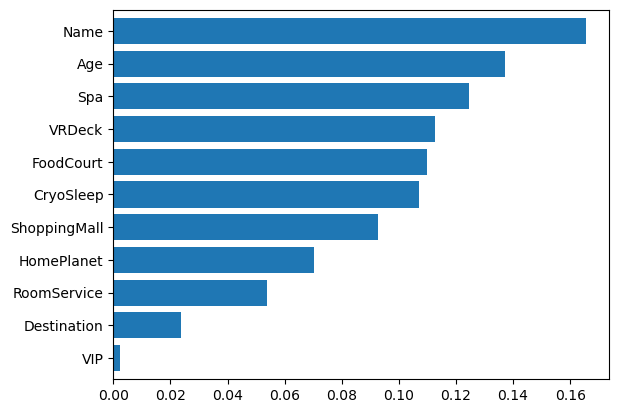

In [45]:
# Random Forests
random_forest = RandomForestClassifier(class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2',
            min_samples_leaf=2, min_samples_split=4,
            n_estimators=500, n_jobs=1,
            warm_start=True)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)#predições
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

pandas.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print("Accuracy ",acc_random_forest)

submission = pandas.DataFrame({
        "PassengerId": test_dataframe["PassengerId"],
        "Transported": Y_pred_rf})

submission.to_csv('MySubmissionFutureTitanicRandonForest01.csv', index=False)

In [46]:
"Accuracy  95.25"

'Accuracy  95.25'

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 77.8
The cross validated score for AdaBoostClassifier is: 72.33


Text(0.5, 1.05, 'Confusion_matrix')

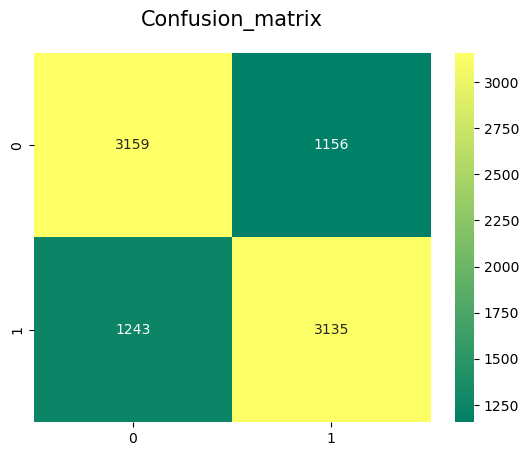

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,features,target,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,features,target,cv=10)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of the Gradient Boosting Classifier is 77.99

The cross validated score for AdaBoostClassifier is: 73.58

In [48]:
y = train_dataframe['Transported']
X = train_dataframe.drop(['Transported'], axis=1)
baseline = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0)
baseline_score = cross_val_score(baseline, X, y, cv=10)
print("XGB avg:",baseline_score.mean())

XGB avg: 0.40400051575009555


name deleted XGB avg: 0.40908364267848996

name by OE XGB avg: 0.41514623825816344

In [49]:
#Ate o presente momento o valor limiar de True e False não pode ser alterado
#0.45 foi o ponto de inferencia
# O proximo passo é pegar os melhores valores de cada modelo, por exemplo quando o valor estiver proximo de 0.45
# priorizar o resultado do RF
y = train_dataframe['Transported']
X = train_dataframe.drop(['Transported'], axis=1)
xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0).fit(X,y)
xgb_preds_log=xgb.predict(test_X)
predT=[]
price = xgb.predict(test_X)
for i in range (len(price)):
    if (price[i] >= 0.45):
        predT.append('True')
    else:
        predT.append('False')
submission = pandas.DataFrame({
    "PassengerId": test_dataframe['PassengerId'],
    "Transported": predT
})

submission.to_csv("MySubmissionFutureTitanicXGB01.csv", index=False)
submission.sample(10)

,PassengerId,Transported
3471,7558_01,False
3818,8358_01,False
3990,8692_03,True
2890,6352_01,True
1687,3618_02,False
2889,6350_01,False
1750,3717_01,False
1806,3858_01,True
3707,8074_01,False
106,0235_01,True
